## 2-D Grid Visualisation: Of Excluded & Remaining Points
Name: Divya Natekar

Net ID: dyn2009

NYU ID: N19974330

### What this program does?
This program enables us to simulate how a scanner can systematically evaluate each X-Coordinate, on a 2-D plane, in order to determine which points will be 'kept' and which will be 'excluded', on the basis of certain visibility rules. Our goal here is to mimic how a LiDAR scanner, placed at a given edge, will try to retain the background, while simultaneously filtering out the occlusions in the foreground.

This program is one of my early programs developed during my Summer 2025 research, which enabled me to visualise how the scanning direction and visibility can affect our point classification. This laid the foundation for our transition into 3-D cylindrical sweeps in the later programs.

First we start by:
- Loading a set of 2-D points from a spreadsheet.
- Treating each unique x value as a potential scanner origin.

For each origin:
- Sweep from left to right.
- Track the highest Y seen so far.
- If a point is higher than the current Ymax, keep it, otherwise exclude it.
- At the end, visualise both the included and excluded points using the Matplotlib library.

### We will start by importing the required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Then by loading and preparing the dataset:

In [2]:
sheet_url = "https://docs.google.com/spreadsheets/d/1io-mxKbNpP8YIhzwwsWFRvGTvry2Ao0j/edit?gid=836186177"
csv_url = sheet_url.replace("/edit?gid=", "/export?format=csv&gid=")

df = pd.read_csv(csv_url)
df = df[['x', 'y']].dropna().astype(float)
df = df.sort_values(by=['x', 'y']).reset_index(drop=True)
print("Initial dataset loaded and sorted. Total rows:", len(df))

Initial dataset loaded and sorted. Total rows: 6518


### Then removing the x = 0 and y = 10 points:

In [3]:
df = df[~((df['x'] == 0) & (df['y'] == 10))]
print("Removed (x=0, y=10). Remaining rows:", len(df))

Removed (x=0, y=10). Remaining rows: 6501


### And now removing the y = 0 points:

In [4]:
# Step 4: Remove y = 0
df = df[df['y'] != 0]
print("Removed y = 0. Remaining rows:", len(df))

Removed y = 0. Remaining rows: 6113


### Then by extracting and saving the points where y < 0 (this is our excluded data):

In [5]:
excluded_ylt0 = df[df['y'] < 0]
excluded_ylt0.to_csv("excluded_y_lt_0.csv", index=False)
print("Excluded points where y < 0:", len(excluded_ylt0))

Excluded points where y < 0: 2824


### Now plotting the excluded points (which is y < 0) into a graph:

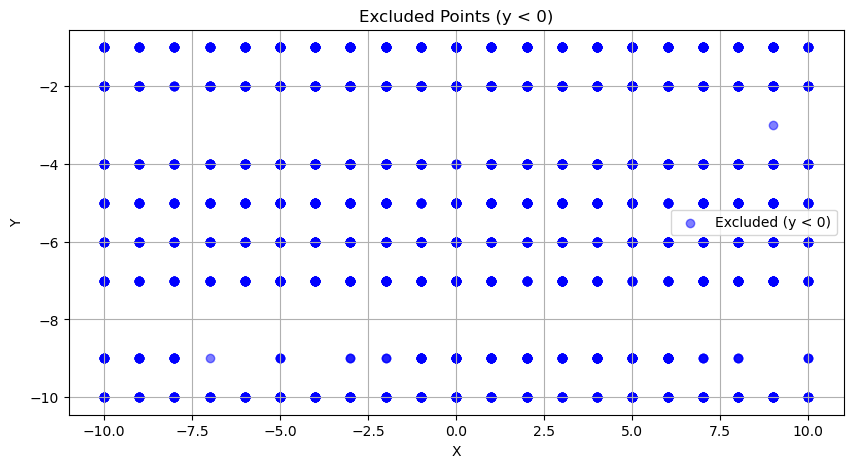

In [6]:
if not excluded_ylt0.empty:
    plt.figure(figsize=(10, 5))
    plt.scatter(excluded_ylt0['x'], excluded_ylt0['y'], color='blue', alpha=0.5, label="Excluded (y < 0)")
    plt.title("Excluded Points (y < 0)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print("No excluded points to plot.")

### Retaining and saving the points where y >= 0 (as this is the remaining data):

In [7]:
df = df[df['y'] >= 0]
df.to_csv("remaining_data_y_gte_0.csv", index=False)
print("Remaining points (y >= 0):", len(df))

Remaining points (y >= 0): 3289


### Now recalculating Y max from x = 0:

In [8]:
near_zero_x = df[np.abs(df['x']) < 1e-6]
Ymax = near_zero_x['y'].max() if not near_zero_x.empty else df.loc[np.abs(df['x']).idxmin(), 'y']
print("Ymax at x ≈ 0 after filtering:", Ymax)

Ymax at x ≈ 0 after filtering: 9.0


### Task B: Find points where y > Y max: 

In [9]:
task_b = df[df['y'] > Ymax]
task_b.to_csv("filtered_task_b_YgtYmax.csv", index=False)
print("Task B points (y > Ymax):", len(task_b))

Task B points (y > Ymax): 279


### Now plotting the remaining data and considering Task B:

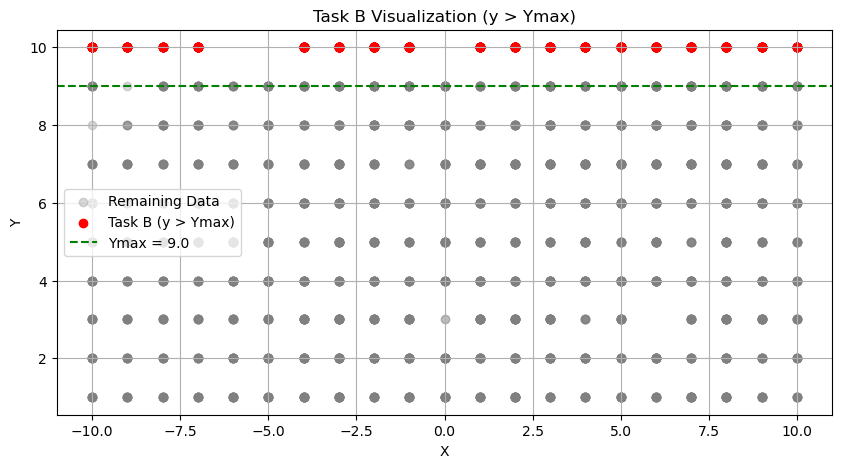

In [10]:
plt.figure(figsize=(10, 5))
plt.scatter(df['x'], df['y'], alpha=0.3, label="Remaining Data", color="gray")
plt.scatter(task_b['x'], task_b['y'], color='red', label="Task B (y > Ymax)")
plt.axhline(Ymax, color='green', linestyle='--', label=f"Ymax = {Ymax}")
plt.title("Task B Visualization (y > Ymax)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()